# [Logistic Regression](https://youtu.be/ehO0-6i9qD4?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)  
<br>

### Problem with Perceptron Trick:  
the problem was in the algorithm it self. it stops after calssifying each data point. (the decision line would be closer to one cluster while may be far away from the other, doesn't create equilibrium, may perform bad on test data.)  
#### Technique being used in perceptron trick in simple words:  
every miss-classified data point will pull the line towrad itself and onto its other side... keeps repeating until all the data points are classfied correctly.  
Corectly classified data points don't play any role.
#### New way:  
Pulling the line works the same as before but there is an addition.  
Now the correctly classified data points will push the line away until a point comes where all the same clustered data points push the line from there sides to make it stop at the most optimal point where it intersects the co-ordinates creating sort of symmetry or an equilibrium.  
#### **Pulling the line**  
* if the point is **far from the line** the pull on the line will be **higher**.
* if the point is **closer to the line**, the pull will be **lighter**.

<br>

#### **Pushing the line**  
* if the point is **far from the line** the push on the line will be **lighter**.
* if the point is **closer to the line**, the push will be **higher**.


earlier we were working with the equation:`Wnew = Wold + lr(Yi - Y_hat)Xi`. and we were using a step function on Y_hat prior putting the value into this equation. step function was doing: `return 1 if y_hat >= 0  else 0`  
Now getting back to the main equation: `Wnew = Wold + lr(Yi - Y_hat)Xi` it was only updating the coefficients when it encountered the data point which was miss-classified. we have to make it so that it also updates when data is classified. How? Yi is constant from data so the change has to be in Y_hat. how our model predicts the data... the equation for predicting won't change what will change is the function. earlier we were using step function to return discrete two values either 1 or 0, now it will be replaced with sigmoid function.  

---  

### Sigmoid Function  

![ytss](assets/sigmoid.png)   
sigmoid function  turns every number (given to it as input and) brings it down into the range of 0 - 1. if the number is negativeit means that sigmoid of that number is less than 0.5 and if its positive it means sigmoid of that number is greater than 0.5.  

### Probability  

![ytss](assets/prob.png)  
<br>
the data point on the line has sigmoid value of 0.5, because model predicted value there is 0 and if 0 is given as input to sigmoid function it returns 0.5. now on the positive side of the line sigmoid value keeps increasing as far as u go. and opposite on the negative side. Sigmoid can also be said in terms of probability.<br> **Example:** 
<br>if the sigmoid value of a correctly classified student who got the placement is 0.7, it can be said that that probability of him getting the placement is 0.7, now as the data points gets far away from the line it becomes more certain that student will get placement (as logic speaks as well) the probability/sigmoid increases. and its opposite on the other side of the line.as far you get from the line there is less and less probability of getting the placement.  
on the right side of the line... the probability of anyone not getting placement will be calculated as `1 - sigmoid` where P is probability of getting the placement.  

So now in our example, every student has two probabilites, probability of getting placement, and not getting placement  

--- 

### Update with new technique  
![ytss](assets/logS.png)  
<r>
* every time something is added into Wold... the line goes moves downward. everytime something is subtracted goes otherwise.
* every missclassified point is pulling the line.
* every correctly classified point is pushing the line.
* There is also the matter of magnitude: how much the line is being pulled or pushed.
<br>
<br>

  ![ytss](assets/magnitude.png)

## Code

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=1,n_redundant=0,random_state=41,hypercube=False,class_sep=30)

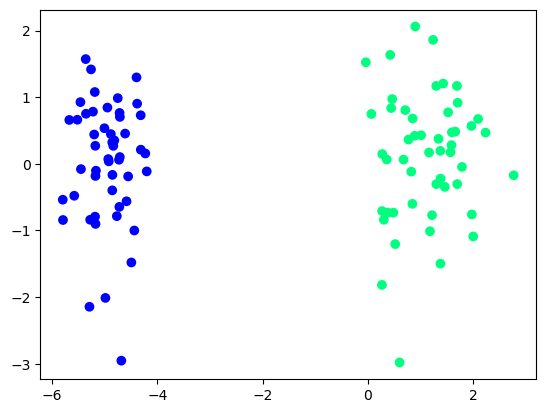

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [39]:
def logisticUsingStep(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,99)
        y_hat = step(np.dot(X[j],weights))
        weights = weights - lr*(y[j] - y_hat)*X[j]

    return weights[0],weights[1:]

def step(x):
    return 1 if x > 0 else 0

In [40]:
intercept_,coef_ = logisticUsingStep(X,y)
m = -coef_[0]/coef_[1]
b = -intercept_/coef_[1]

x_input  = np.linspace(X.min(),X.max(),X.shape[0])
y_input = m*x_input + b

In [32]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)
print(lor.intercept_)
print(lor.coef_)

[3.54700273]
[[1.77255101 0.01190507]]


In [34]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -lor.intercept_/lor.coef_[0][1]

x_input1  = np.linspace(X.min(),X.max(),X.shape[0])
y_input1 = m*x_input1 + b

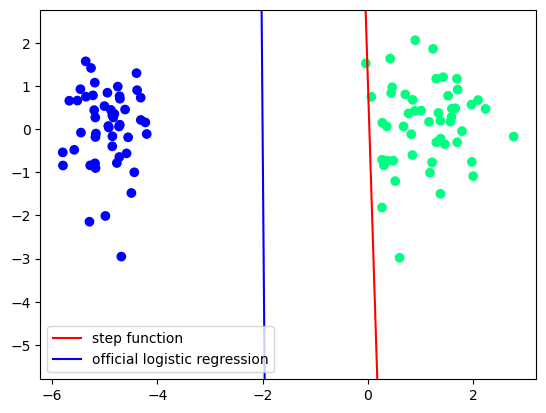

In [38]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.plot(x_input,y_input,c='r',label='step function')
plt.plot(x_input1,y_input1,c='b',label='official logistic regression')

plt.ylim(X.min(),X.max())
plt.legend()
plt.show()

In [57]:
# Now doing wuth sigmoid
def logisticUsingSigmoid(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,99)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

    return weights[0],weights[1:]

def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [58]:
intercept_,coef_ = logisticUsingSigmoid(X,y)
m = -coef_[0]/coef_[1]
b = -intercept_/coef_[1]

x_input2  = np.linspace(X.min(),X.max(),X.shape[0])
y_input2 = m*x_input2 + b

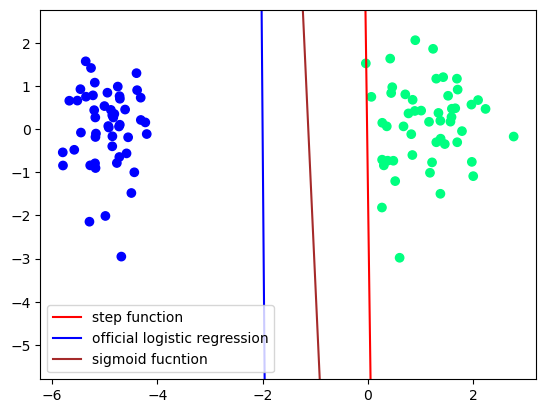

In [59]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.plot(x_input,y_input,c='r',label='step function')
plt.plot(x_input1,y_input1,c='b',label='official logistic regression')
plt.plot(x_input2,y_input2,color='brown',label='sigmoid fucntion')

plt.ylim(X.min(),X.max())
plt.legend()
plt.show()

# Better but not best... not like the official logistic regression yet